In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2|

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from dsn.util.systems import system_from_str
import scipy

resdir = '/Users/sbittner/Documents/dsn/dsn/results/RNN/';
D = 4;
T = 10;
nlayers = 10;
sigma_init = 1.0;
lr_order = -3;
c_init_order = -5;

/Users/sbittner/anaconda/envs/dsn/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


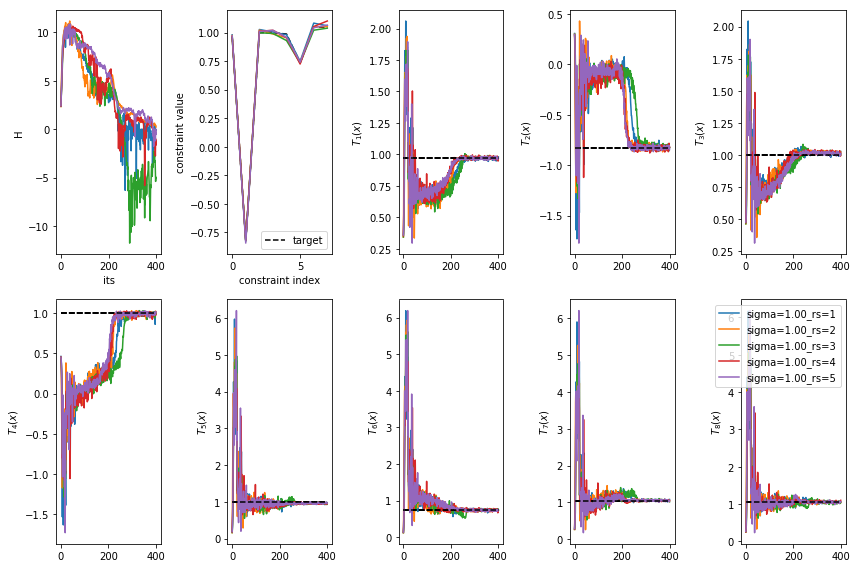

In [3]:
figsize = (12, 8);
plt.figure(figsize=figsize);

for rs in range(1,6):
    savedir = resdir + 'rank1_rnn_D=%d_flow=M_%dP_sigma=%.2f_lr_order=%d_c=%d_rs=%d/' % \
                       (D, nlayers, sigma_init, lr_order, c_init_order, rs);
    npzfile = np.load(savedir + 'results.npz');

    label = 'sigma=%.2f_rs=%d' % (sigma_init, rs);
    
    Hs = npzfile['Hs'];
    mean_T_phis = npzfile['mean_T_phis'];
    mu = npzfile['mu'];

    plt.subplot(2,5,1);
    plt.plot(Hs);
    plt.xlabel('its');
    plt.ylabel('H');

    mu_len = mu.shape[0];
    x_axis = np.arange(mu_len);
    plt.subplot(2,5,2);
    if (rs==1):
        plt.plot(x_axis, mu, 'k--', label='target');
    plt.plot(mean_T_phis[-1,:]);
    plt.legend();
    plt.xlabel('constraint index');
    plt.ylabel('constraint value');

    for i in range(mu_len):
        plt.subplot(2,5,3+i);
        plt.plot(mean_T_phis[:,i], label=label);
        plt.plot([0, mean_T_phis.shape[0]], [mu[i], mu[i]], 'k--');
        if (rs==1):
            plt.ylabel(r'$T_%d(x)$' % (i+1));
plt.tight_layout();
plt.legend();
plt.show();

In [4]:
k_max = 20;
num_rs = 5;


for rs in range(1, 1+num_rs):

    savedir = resdir + 'rank1_rnn_D=%d_flow=M_%dP_sigma=%.2f_lr_order=%d_c=%d_rs=%d/' % \
                       (D, nlayers, sigma_init, lr_order, c_init_order, rs);
    npzfile = np.load(savedir + 'results.npz');
    title ='sigma=%.2f_rs=%d' % (sigma_init, rs)
    mu = npzfile['mu']
    mu_len = mu.shape[0];
    if (rs==1):
        p_values = np.zeros((num_rs, k_max, mu_len));

    for k in range(k_max):
        T_phis = npzfile['T_phis'][k+1];

        for i in range(mu_len):
            t, p = scipy.stats.ttest_1samp(T_phis[:,i], mu[i]);
            p_values[rs-1,k,i] = p;


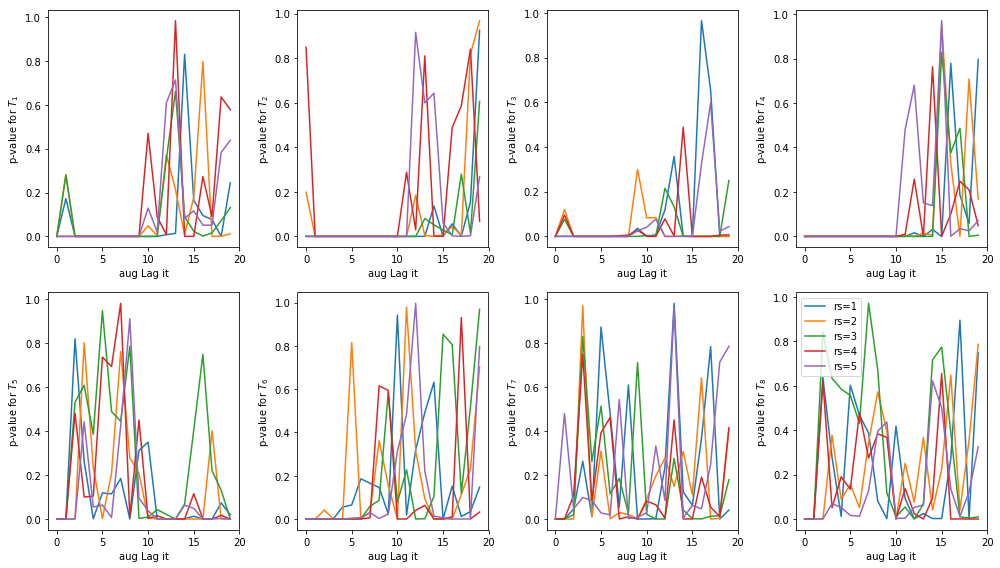

In [5]:
figsize = (14, 8);
plt.figure(figsize=figsize);
for rs in range(1, 1+num_rs):
    label = 'rs=%d' % rs;
    for i in range(mu_len):
        plt.subplot(2,4,i+1);
        plt.plot(p_values[rs-1,:,i], label=label);
        if (rs==1):
            plt.ylabel(r'p-value for $T_%d$' % (i+1));
            plt.xlabel('aug Lag it');
plt.tight_layout();
plt.legend();
plt.show();


In [16]:
alpha = 0.01;
AL_final_its = [];
for i in range(num_rs):
    print('i=%d' % i);
    for j in range(k_max):
        con_sat = np.prod(p_values[i,j,:] > alpha);
        if (con_sat==1):
            AL_final_its.append(j);
            break;
print(AL_final_its);


i=0
i=1
i=2
i=3
i=4
[12, 11, 13, 10, 10]


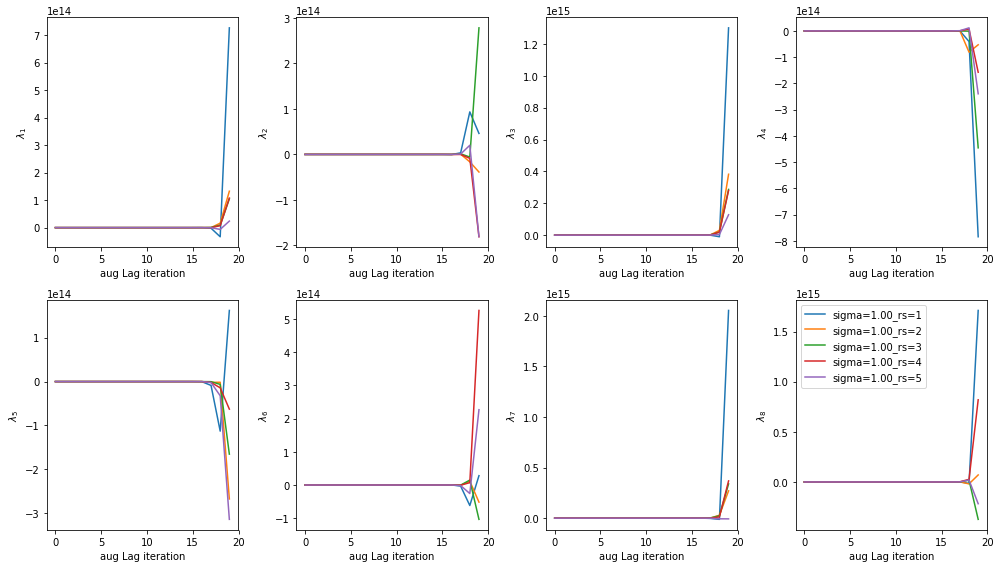

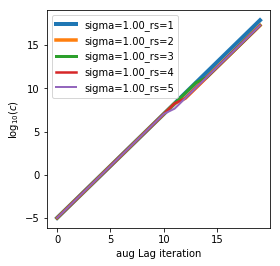

In [10]:
figsize = (14, 8);
plt.figure(figsize=figsize);
for rs in range(1,6):
    savedir = resdir + 'rank1_rnn_D=%d_flow=M_%dP_sigma=%.2f_lr_order=%d_c=%d_rs=%d/' % \
                       (D, nlayers, sigma_init, lr_order, c_init_order, rs);
    npzfile = np.load(savedir + 'results.npz');
    label = 'sigma=%.2f_rs=%d' % (sigma_init, rs);

    lambdas = npzfile['lambdas'];
    num_cons = lambdas.shape[1];
    iters = np.arange(lambdas.shape[0]);
    for i in range(num_cons):
        plt.subplot(2, num_cons//2, i+1);
        plt.plot(iters, lambdas[:,i], label=label);
        if (rs==1):
            plt.ylabel(r'$\lambda_%d$' % (i+1));
        plt.xlabel('aug Lag iteration');
plt.tight_layout();
    
plt.legend();
plt.show();

figsize = (4, 4);
plt.figure(figsize=figsize);
for rs in range(1,6):
    savedir = resdir + 'rank1_rnn_D=%d_flow=M_%dP_sigma=%.2f_lr_order=%d_c=%d_rs=%d/' % \
                       (D, nlayers, sigma_init, lr_order, c_init_order, rs);
    npzfile = np.load(savedir + 'results.npz');
    label = 'sigma=%.2f_rs=%d' % (sigma_init, rs);

    cs = npzfile['cs'];
    iters = np.arange(cs.shape[0]);
    plt.plot(iters, np.log10(cs), lw=4.5-.5*rs, label=label);
    
plt.xlabel('aug Lag iteration');
plt.ylabel(r'$\log_{10}(c)$')
plt.legend();
plt.show();

(1000, 4)


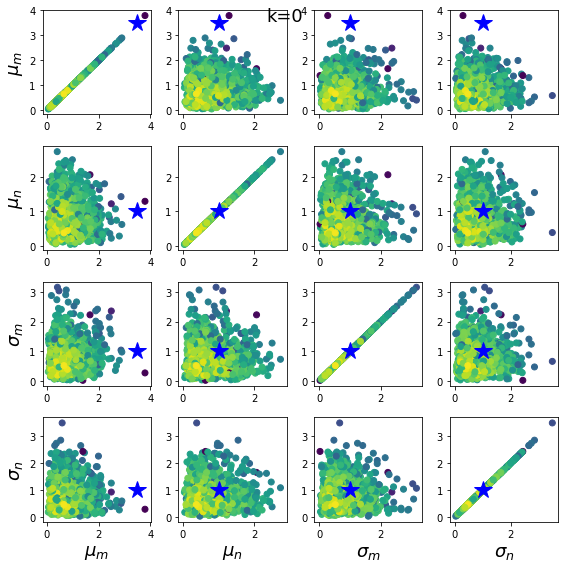

(1000, 4)


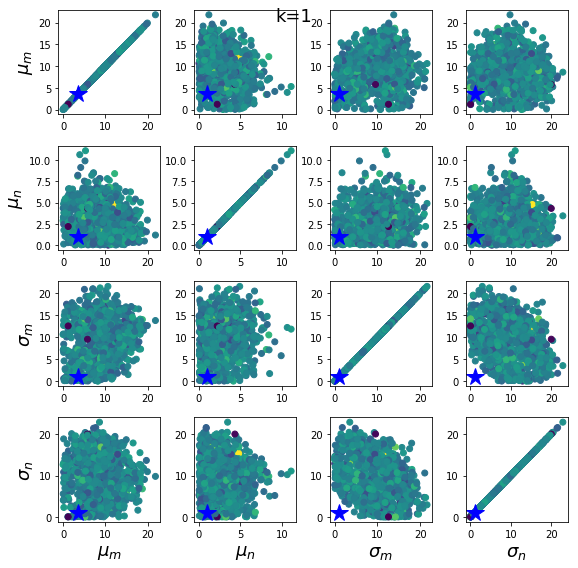

(1000, 4)


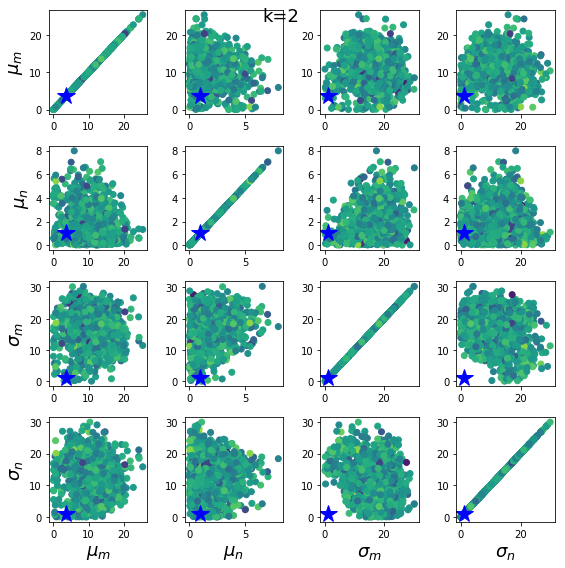

(1000, 4)


KeyboardInterrupt: 

In [17]:
k_max = 20;
fontsize = 18;
labels = [r'$\mu_m$', r'$\mu_n$', r'$\sigma_m$', r'$\sigma_n$'];

rs = 1;
savedir = resdir + 'rank1_rnn_D=%d_flow=M_%dP_sigma=%.2f_lr_order=%d_c=%d_rs=%d/' % \
                       (D, nlayers, sigma_init, lr_order, c_init_order, rs);
npzfile = np.load(savedir + 'results.npz');
    
x_val = [3.5, 1.0, 1.0, 1.0];
figsize = (8,8);

for k in range(k_max):
    phis = npzfile['phis'][k];
    log_q_phis = npzfile['log_q_phis'][k];
    print(phis.shape);
    plt.figure(figsize=figsize);
    for i in range(D):
        for j in range(D):
            ind = i*D + j + 1;
            plt.subplot(D, D, ind);
            plt.scatter(phis[:,j], phis[:, i], c=log_q_phis);
            plt.plot(x_val[j], x_val[i], 'b*', markersize=18);
            if (i==3):
                plt.xlabel(labels[j], fontsize=fontsize);
            if (j==0):
                plt.ylabel(labels[i], fontsize=fontsize);
    plt.suptitle('k=%d' % k, fontsize=fontsize);
    plt.tight_layout();
    plt.show();


(1000, 4)


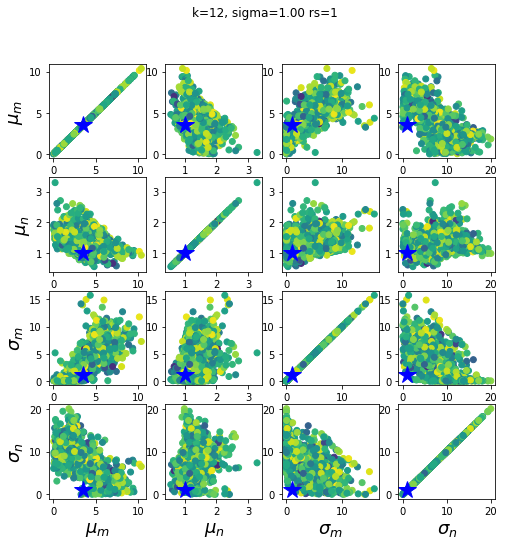

(1000, 4)


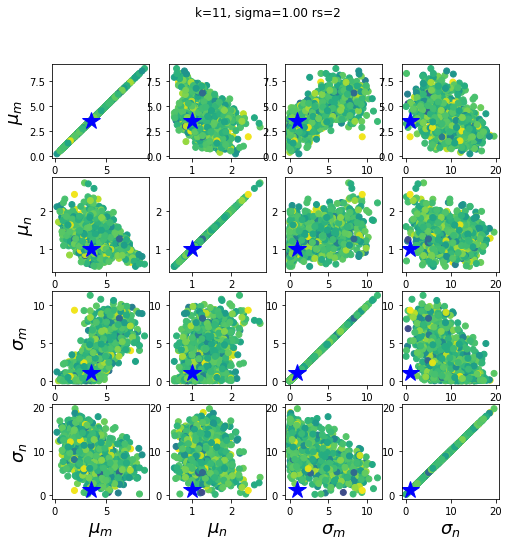

(1000, 4)


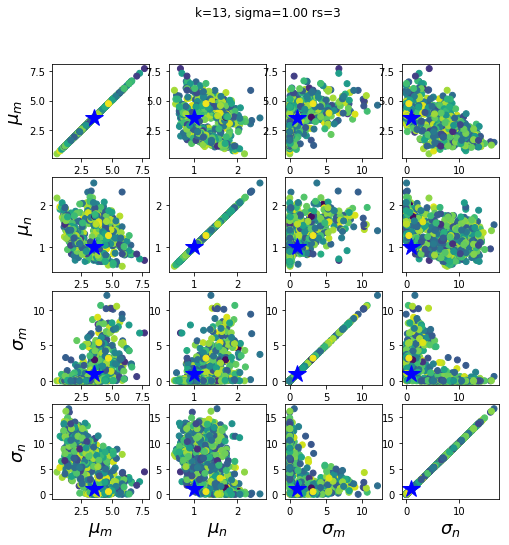

(1000, 4)


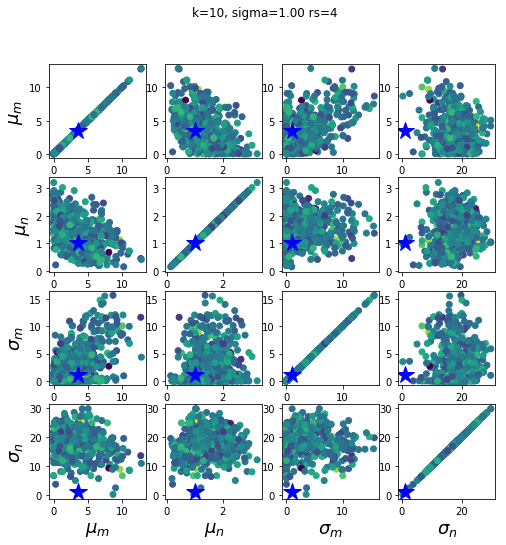

(1000, 4)


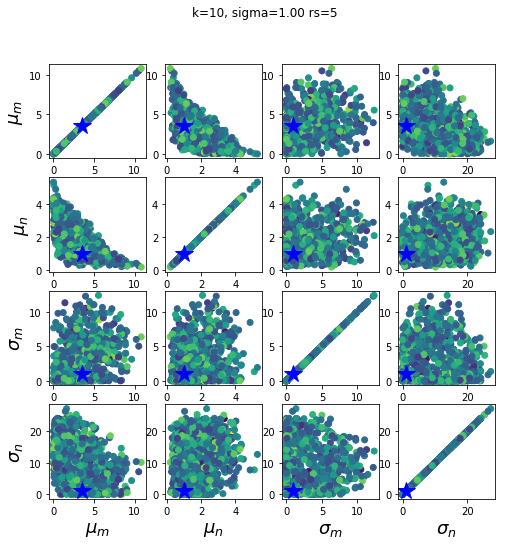

In [18]:
fontsize = 18;
labels = [r'$\mu_m$', r'$\mu_n$', r'$\sigma_m$', r'$\sigma_n$'];

x_val = [3.5, 1.0, 1.0, 1.0];
figsize = (8,8);

sigma_init = 1.0;
for rs in range(1,6):
    k = AL_final_its[rs-1];
    
    savedir = resdir + 'rank1_rnn_D=%d_flow=M_%dP_sigma=%.2f_lr_order=%d_c=%d_rs=%d/' % \
                       (D, nlayers, sigma_init, lr_order, c_init_order, rs);
    npzfile = np.load(savedir + 'results.npz');
    title ='k=%d, sigma=%.2f rs=%d' % (k, sigma_init, rs)
    phis = npzfile['phis'][k];
    log_q_phis = npzfile['log_q_phis'][k];
    print(phis.shape);
    plt.figure(figsize=figsize);
    for i in range(D):
        for j in range(D):
            ind = i*D + j + 1;
            plt.subplot(D, D, ind);
            plt.scatter(phis[:,j], phis[:, i], c=log_q_phis);
            plt.plot(x_val[j], x_val[i], 'b*', markersize=18);
            if (i==3):
                plt.xlabel(labels[j], fontsize=fontsize);
            if (j==0):
                plt.ylabel(labels[i], fontsize=fontsize);
    plt.suptitle(title);
    plt.show();

